In [1]:
# in order to inspect the time I started the project\
# you can inspect the commit history on github. 
# I also experiment with start and end times in the following lines

In [2]:
# i will import the same libraries used for my 550 project 
# this is to save time for analysis. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# adding the dta files to the prohect folder and importing 
ra_data = pd.read_stata('RA_merge_exercise.dta')
industry_data = pd.read_stata('ntmaj10_merge_exercise.dta')

In [4]:
# inspecting missing values 
ra_data.head()

,returnts,zipcd,returntypecd,ein,irs990totalassetsboyamt,irs990revenueamt,year
0,2017-11-27T12:07:15-06:00,19110,990EZ,112642391,NaN,NaN,2015.0
1,2018-01-17T07:35:17-08:00,19063,990EZ,112769918,NaN,NaN,2015.0
2,2018-05-08T09:57:45-05:00,19087,990PF,113202308,NaN,NaN,NaN
3,2018-11-15T10:19:57-05:00,19020,990EZ,113398321,NaN,NaN,2015.0
4,2018-02-26T10:01:32-06:00,19129,990EZ,113625329,NaN,NaN,2015.0


In [5]:
industry_data.head()

,ein,ntmaj10
0,100007967,ED
1,100727381,HU
2,100817874,AR
3,100898048,HE
4,100914983,HE


In [6]:
# converting to CSV files to inspect the data
import pandas as pd

# Load the datasets
ra_data = pd.read_stata('RA_merge_exercise.dta')
industry_data = pd.read_stata('ntmaj10_merge_exercise.dta')

# Convert and save as CSV
ra_data.to_csv('RA_merge_exercise.csv', index=False)
industry_data.to_csv('ntmaj10_merge_exercise.csv', index=False)


In [7]:
# making a note that I briefly launched stata and used the browse function to
# verify that the the csv data mapped to the .dta files

In [8]:
# preforming the merge
merged_data = pd.merge(ra_data, industry_data, on='ein', how='left')


In [9]:
# inspecting the head of the data
merged_data.head()

,returnts,zipcd,returntypecd,ein,irs990totalassetsboyamt,irs990revenueamt,year,ntmaj10
0,2017-11-27T12:07:15-06:00,19110,990EZ,112642391,NaN,NaN,2015.0,AR
1,2018-01-17T07:35:17-08:00,19063,990EZ,112769918,NaN,NaN,2015.0,AR
2,2018-05-08T09:57:45-05:00,19087,990PF,113202308,NaN,NaN,NaN,NaN
3,2018-11-15T10:19:57-05:00,19020,990EZ,113398321,NaN,NaN,2015.0,NaN
4,2018-02-26T10:01:32-06:00,19129,990EZ,113625329,NaN,NaN,2015.0,ED


In [10]:
#first, I will check missing values 
missing_values = merged_data.isna().sum()
print(missing_values)


returnts                      0
zipcd                         0
returntypecd                  0
ein                           0
irs990totalassetsboyamt    1530
irs990revenueamt           2457
year                       1473
ntmaj10                    1922
dtype: int64


In [18]:
# for the purposes of this analysis i will create a dataframe where missing values 
# for industry are dropped 
# Assuming merged_data is your DataFrame after the merge
# Drop rows with missing values in any column
cleaned_data = merged_data.dropna()

# If you want to inspect the result and see how many rows remain
print(cleaned_data.shape)


# If you want to inspect the result and see how many rows remain

missing_cleaned = cleaned_data.isna().sum()
print(missing_cleaned)


(1115, 8)
returnts                   0
zipcd                      0
returntypecd               0
ein                        0
irs990totalassetsboyamt    0
irs990revenueamt           0
year                       0
ntmaj10                    0
dtype: int64


In [19]:
# inspecting zip codes
cleaned_data_zips = cleaned_data['zipcd'].nunique()
print(cleaned_data_zips)
# its unlikely we can break industry out by zipcode

243


<Figure size 720x432 with 0 Axes>

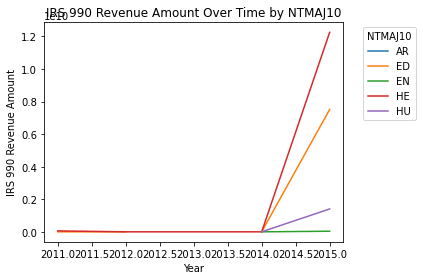

In [22]:
# for now we will plot returns over time by industry 
# i will use a pivot function as I did in the project I did for econ 550

grouped_data = merged_data.groupby(['ntmaj10', 'year'])['irs990revenueamt'].sum().reset_index()

# Pivot the data for plotting
pivot_data = grouped_data.pivot(index='year', columns='ntmaj10', values='irs990revenueamt')

# Plot the data
plt.figure(figsize=(10, 6))
pivot_data.plot(kind='line')
plt.title('IRS 990 Revenue Amount Over Time by NTMAJ10')
plt.xlabel('Year')
plt.ylabel('IRS 990 Revenue Amount')
plt.legend(title='NTMAJ10', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [21]:
# clearly something is wrong 
# checking if csvs are any better



In [24]:
ra_data_csv = pd.read_csv('RA_merge_exercise.csv')
industry_data_csv = pd.read_csv('ntmaj10_merge_exercise.csv')

In [ ]:
# preforming the merge
merged_csv = pd.merge(ra_data, industry_data, on='ein', how='left')